In [18]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from skimage.metrics import peak_signal_noise_ratio

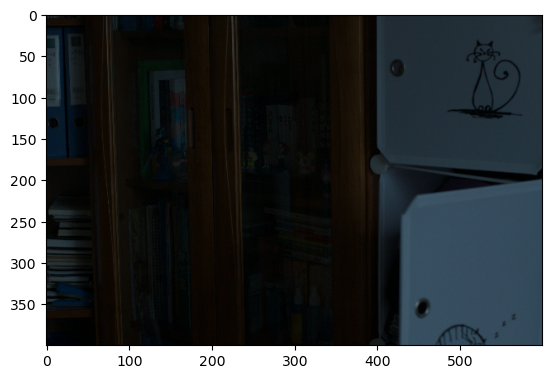

In [15]:
l=cv.imread('/Users/mauryadarsh07gmail.com/Downloads/DeepLearning/LowLit_denoise/LOLdataset/our485/low/2.png')
h=cv.imread('/Users/mauryadarsh07gmail.com/Downloads/DeepLearning/LowLit_denoise/LOLdataset/our485/high/2.png')
l=cv.cvtColor(l,cv.COLOR_BGR2RGB)
h=cv.cvtColor(h,cv.COLOR_BGR2RGB)
plt.imshow(l)

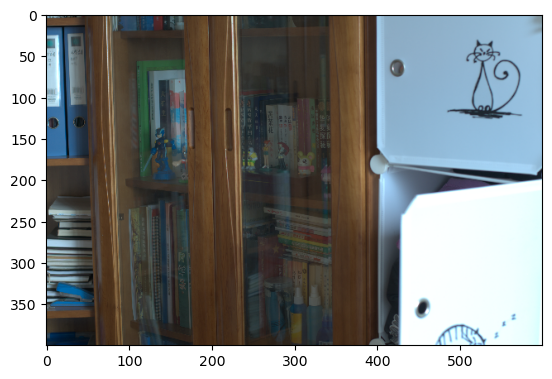

In [109]:
plt.imshow(h)

### Processing Different Features

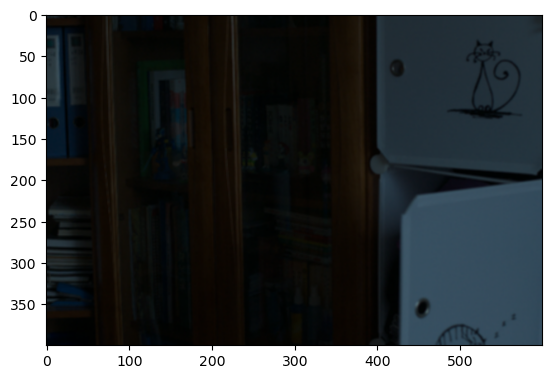

In [58]:
# blur
blur=cv.GaussianBlur(l,(3,3),cv.BORDER_DEFAULT)

plt.imshow(blur)


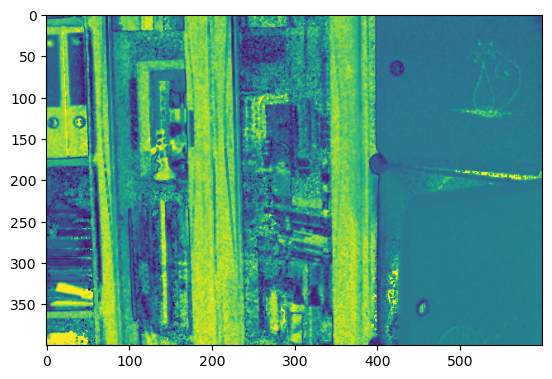

In [62]:
hsv=cv.cvtColor(blur,cv.COLOR_BGR2HSV)
plt.imshow(hsv[...,1])

HISTOGRAM_EQUILIZATION

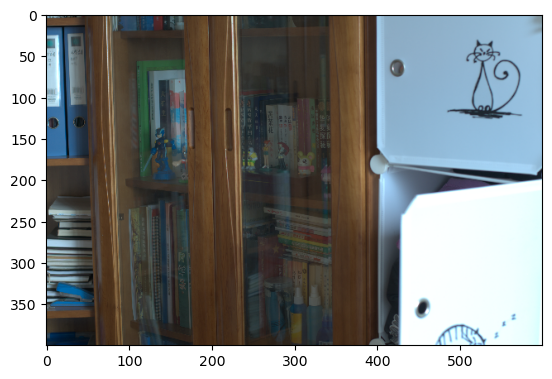

In [110]:
plt.imshow(h)


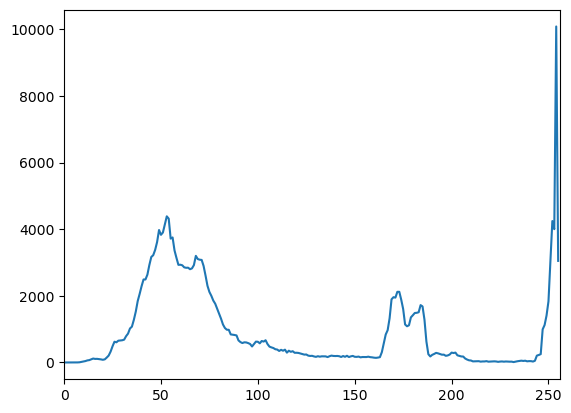

In [117]:
gray=cv.cvtColor(h,cv.COLOR_RGB2GRAY)
gray_hist=cv.calcHist([gray],[0],None,[256],[0,256])
plt.xlim([0,256])

plt.plot(gray_hist)


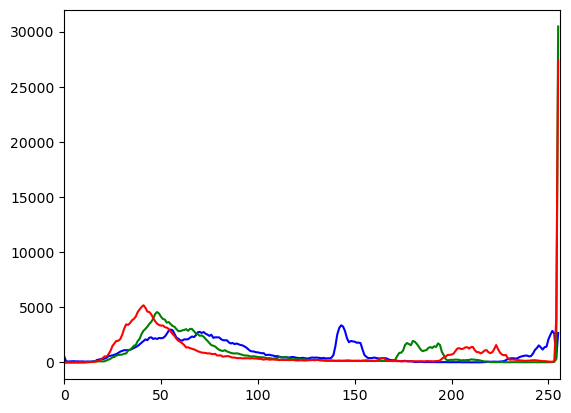

In [120]:
colors=('b','g','r')
for i,col in enumerate(colors):
    hist=cv.calcHist([h],[i],None,[256],[0,256])
    plt.xlim([0,256])
    plt.plot(hist,color=col)


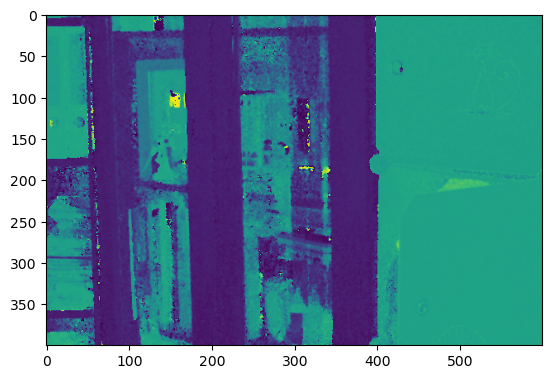

In [359]:
hsv=cv.cvtColor(blur,cv.COLOR_RGB2HSV)
plt.imshow(hsv[...,0])

array([[182, 181, 193, ..., 177, 173, 174],
       [189, 177, 193, ..., 176, 175, 172],
       [198, 172, 186, ..., 176, 176, 176],
       ...,
       [ 32,  68,  77, ..., 237, 242, 237],
       [ 59,  87,  50, ..., 242, 242, 229],
       [ 77,  97,  87, ..., 247, 247, 247]], dtype=uint8)

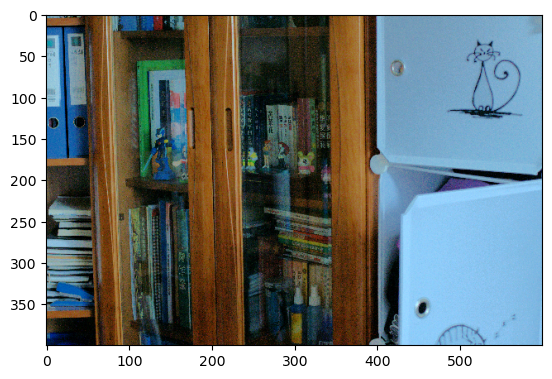

In [364]:
hsv=cv.cvtColor(l,cv.COLOR_RGB2HSV)
h,s,v=cv.split(hsv)
v=cv.equalizeHist(v)
hsv=cv.merge((h,s,v))

rgb=cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
plt.imshow(rgb)
hsv[...,2]

# ls[1]*fac

In [250]:
hsv3=cv.cvtColor(h,cv.COLOR_RGB2HSV)
hsv3[...,2]

array([[176, 197, 201, ..., 155, 153, 153],
       [193, 183, 207, ..., 156, 154, 153],
       [201, 167, 205, ..., 156, 155, 153],
       ...,
       [ 63,  61,  62, ..., 255, 255, 255],
       [ 62,  63,  62, ..., 255, 255, 255],
       [ 64,  64,  62, ..., 255, 255, 255]], dtype=uint8)

In [259]:
hsv[...,2]

array([[51, 50, 55, ..., 42, 38, 39],
       [54, 43, 55, ..., 41, 40, 37],
       [56, 37, 53, ..., 41, 41, 41],
       ...,
       [ 6, 10, 11, ..., 93, 94, 93],
       [ 9, 12,  8, ..., 94, 94, 91],
       [11, 13, 12, ..., 95, 95, 95]], dtype=uint8)

In [6]:
lo=glob('/Users/mauryadarsh07gmail.com/Downloads/DeepLearning/LowLit_denoise/LOLdataset/our485/low/*.png')
hi=glob('/Users/mauryadarsh07gmail.com/Downloads/DeepLearning/LowLit_denoise/LOLdataset/our485/high/*.png')

### Different Image Processing Architechtures

In [13]:
def denoise(img,img1):
    h=cv.imread(img1)
    h=cv.cvtColor(h,cv.COLOR_BGR2RGB)
    l=cv.imread(img)
    l=cv.cvtColor(l,cv.COLOR_BGR2RGB)
    l=cv.GaussianBlur(l,(3,3),3)
    hsv=cv.cvtColor(l,cv.COLOR_RGB2HSV)
    
    hsv1=hsv.copy()
    
    # increasing brightness of image
    r=np.array(hsv1[...,2],dtype='int32')
    r=r*8
    r=np.clip(r,0,255)
    r=np.array(r,dtype='uint8')
    hsv1[...,2]=r

    rgb=cv.cvtColor(hsv1,cv.COLOR_HSV2RGB)
    colors=('b','g','r')
    for i,col in enumerate(colors):
        hist=cv.calcHist([rgb],[i],None,[256],[0,256])
        plt.xlim([0,256])
        plt.plot(hist,color=col)
    plt.show()
    for i,col in enumerate(colors):
        hist=cv.calcHist([h],[i],None,[256],[0,256])
        plt.xlim([0,256])
        plt.plot(hist,color=col)
    plt.show()
    
    fig , ax=plt.subplots(1,2)
    ax[0].imshow(rgb)
    
    ax[1].imshow(h)
    return rgb,h


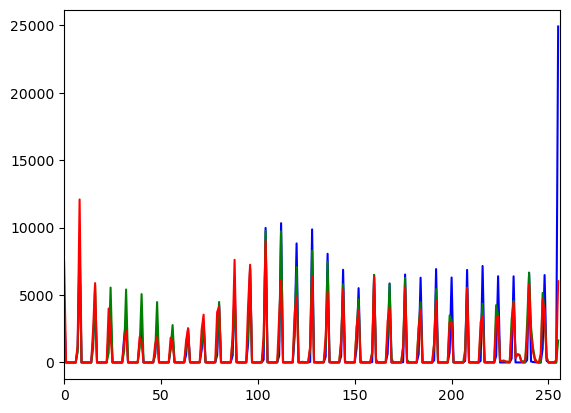

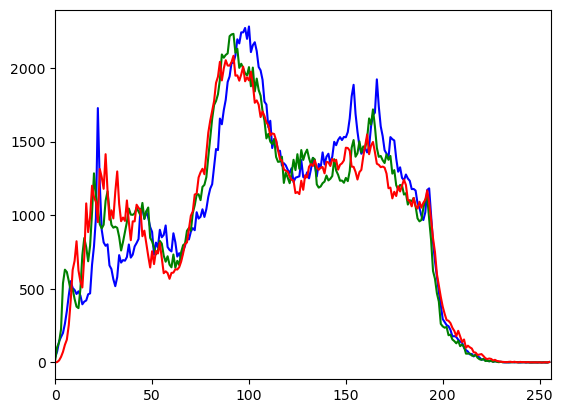

16.09108494114951


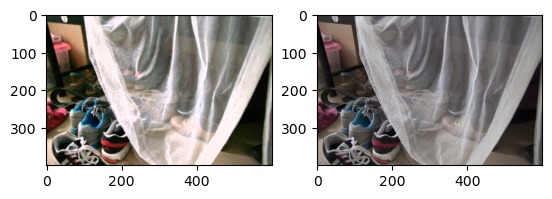

In [19]:
fin,_=denoise(lo[0],hi[0])
print(peak_signal_noise_ratio(fin,_))
fig , ax=plt.subplots(1,2)
ax[0].imshow(fin)
ax[1].imshow(_)

In [37]:
def denoise1(img,img1):
    hi=cv.imread(img1)
    hi=cv.cvtColor(hi,cv.COLOR_BGR2RGB)
    l=cv.imread(img)
    l=cv.cvtColor(l,cv.COLOR_BGR2RGB)
    l=cv.GaussianBlur(l,(5,5),5)
    clahe=cv.createCLAHE(clipLimit=10)

    # using histogram equilization on v component of hsv image
    hsv=cv.cvtColor(l,cv.COLOR_RGB2HSV)
    h,s,v=cv.split(hsv)
    v=cv.equalizeHist(v)

    hsv1=cv.merge((h,s,v))
    bright=np.ones(l.shape,dtype='uint8')
    rgb=cv.cvtColor(hsv1,cv.COLOR_HSV2RGB)
    r,g,b=cv.split(l)
    r=clahe.apply(r)
    r=cv.equalizeHist(r)
    g=clahe.apply(g)
    g=cv.equalizeHist(g)
    b=clahe.apply(b)
    b=cv.equalizeHist(b)
    rgb1=cv.merge((r,g,b))
    fin=cv.addWeighted(rgb,0.5,rgb1,0.5,0)
 
    fig , ax=plt.subplots(1,3)
    ax[0].imshow(fin)
    ax[1].imshow(hi)
    ax[2].imshow(rgb1)
    return fin,hi


17.490443138223416


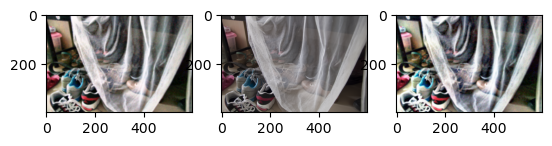

In [38]:
fin,_=denoise1(lo[0],hi[0])
print(peak_signal_noise_ratio(fin,_))


In [32]:
def dim(limg,himg):
  limg=cv.imread(limg)
  himg=cv.imread(himg)
  limg=cv.cvtColor(limg,cv.COLOR_BGR2RGB)
  im=np.copy(himg)

  limg=cv.resize(limg,(512,512))
 

  im=cv.cvtColor(im,cv.COLOR_BGR2RGB)
  hsv=cv.cvtColor(im,cv.COLOR_RGB2HSV)
  hsv[...,2]=hsv[...,2]*0.15
  
  im=cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
  im=cv.resize(im,(512,512))

  return limg,im


def check_pixel_range(image, x):
  """
  This function checks if 99.7% of pixels in an image lie within the range [0, x].

  Args:
      image: The input image as a NumPy array.
      x: The upper bound of the pixel range.

  Returns:
      True if 99.7% of pixels fall within the range, False otherwise.
  """

  # Flatten the image to a 1D array for easier processing
  flat_image = image.flatten()

  # Count the number of pixels within the range
  in_range = np.count_nonzero((flat_image >= 0) & (flat_image <= x))

  # Calculate the percentage of pixels in range
  total_pixels = flat_image.size
  percentage_in_range = (in_range / total_pixels) * 100

  # Check if 99.7% of pixels are within the range
  return percentage_in_range >= 99.7

def imgPrep(img,img1):
    hi=cv.imread(img1)
    hi=cv.cvtColor(hi,cv.COLOR_BGR2RGB)
    hi=cv.resize(hi,(512,512))
    l=img
    
    
    r,g,b=cv.split(l)
    xr=0
    xg=0
    xb=0
    # finding pixel value which comprise 99.7% pixels
    for i in range(0,255,5):
        if(check_pixel_range(r,i)):
            xr=i
            break
    for i in range(0,255,5):
        if(check_pixel_range(g,i)):
            xg=i
            break
    for i in range(0,255,5):
        if(check_pixel_range(b,i)):
            xb=i
            break
   
#    expanding this range to cover full pixel range of [0,255]

    d=np.array(r,dtype='float64')
    d/=xr
    d=np.ceil(d*300)
    d=np.clip(d,0,255)
    d=np.array(d,dtype='uint8')
    r=d


    d=np.array(g,dtype='float64')
    d/=xg
    d=np.ceil(d*300)
    d=np.clip(d,0,255)
    d=np.array(d,dtype='uint8')
    g=d


    d=np.array(b,dtype='float64')
    d/=xb
    d=np.ceil(d*300)
    d=np.clip(d,0,255)
    d=np.array(d,dtype='uint8')
    b=d

    fin=cv.merge((r,g,b))
    
    return fin,hi



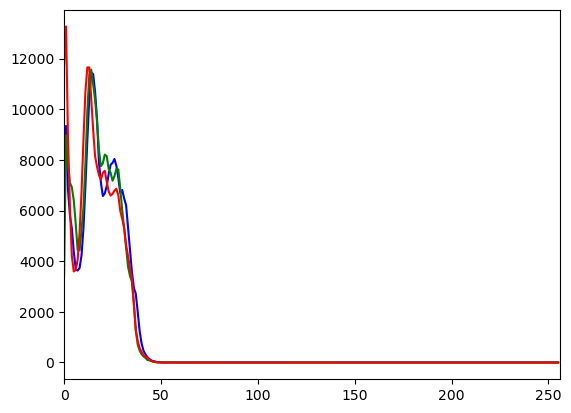

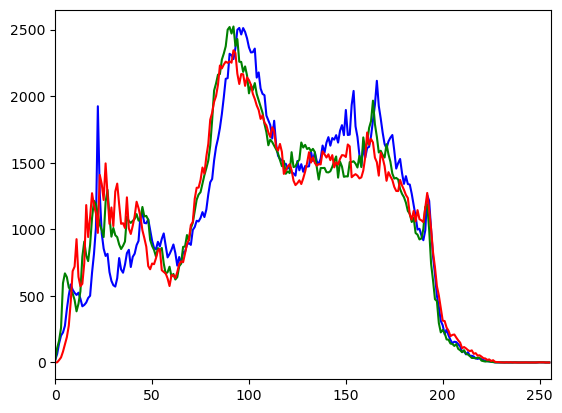

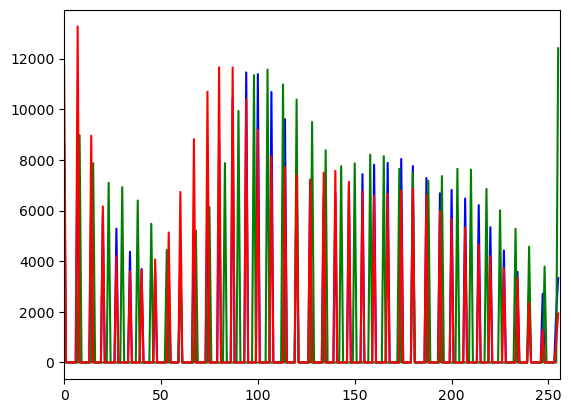

19.39222842815177


In [34]:
fin,_=imgPrep(lo[0],hi[0])
print(peak_signal_noise_ratio(fin,_))


### -----END-----